In [11]:
pwd()
using Pkg; Pkg.activate("../")
Pkg.add("Polynomials")
using FermiCG, NPZ, JLD2
using Plots
readdir()

  Activating project at `~/code/adiabatic_connection/FermiCG`
   Resolving package versions...
  No Changes to `~/code/adiabatic_connection/FermiCG/Project.toml`
  No Changes to `~/code/adiabatic_connection/FermiCG/Manifest.toml`
Precompiling project...
  ✗ FermiCG
  0 dependencies successfully precompiled in 15 seconds (268 already precompiled)
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


13-element Vector{String}:
 ".ipynb_checkpoints"
 "AdiabaticConnection.ipynb"
 "PAH18-1.ipynb"
 "benzene-10mer.ipynb"
 "cepa.jl"
 "cmf_h6.jl"
 "cr_freedman_def2-svp-2-uhf.ipynb"
 "cr_freedman_def2-svp-2.ipynb"
 "cr_qubit_scf.ipynb"
 "davidson.jl"
 "fci_h6.jl"
 "fe2s2"
 "fe2s2.ipynb"

In [15]:
Pkg.precompile()

Precompiling project...
  ✓ FermiCG
  1 dependency successfully precompiled in 14 seconds (268 already precompiled)
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


In [4]:
# Load data for a square Helium cluster with cc-pvdz (20, orbitals)
@load "../test/_testdata_cmf_he4.jld2"


# Create a Block Sparse Tucker state, targetting 5 roots
v = FermiCG.BSTstate(clusters, FermiCG.FockConfig(init_fspace), cluster_bases, R=5)


# Add single Helium excited states into the initial basis
FermiCG.add_single_excitons!(v, FermiCG.FockConfig(init_fspace), cluster_bases)


# Randomize initial vector coefficients
FermiCG.randomize!(v)
FermiCG.orthonormalize!(v)


# Solve for the 5 lowest roots in the current "excitonic" basis
e_ci, v = FermiCG.ci_solve(v, cluster_ops, clustered_ham);


# Define a grid of lambda values
lambda_grid = [collect(0:10)...]/10.0

UnitRange{Int64}[1:1, 1:1, 1:1, 1:1]
TuckerConfig{4}((1:1, 1:1, 1:1, 1:1))
 |== BST CI ========================================================
 Solve CI with # variables:                                77
 Cache Hamiltonian:                                  8.704414 seconds (33.02 M allocations: 1.672 GiB, 9.00% gc time, 99.72% compilation time)
 Iter:   1 SS: 5    E:  -13.65357517   -13.34931308   -13.19472271   -13.07327037   -12.91979654   R: 1.3e+00  1.1e+00  1.3e+00  1.3e+00  1.2e+00   LinDep: 1.1e-16* 
 Iter:   2 SS: 10   E:  -15.48000479   -14.65522499   -14.37312356   -14.32134021   -14.29074193   R: 1.4e+00  7.5e-01  7.1e-01  6.9e-01  7.1e-01   LinDep: 7.8e-16* 
 Iter:   3 SS: 15   E:  -16.69591376   -15.07026989   -14.88030561   -14.80257068   -14.66870959   R: 7.7e-01  5.6e-01  6.6e-01  7.1e-01  4.5e-01   LinDep: 5.6e-16* 
 Iter:   4 SS: 20   E:  -16.87301129   -15.30630847   -15.22753659   -15.20807330   -14.89106636   R: 1.8e-01  2.3e-01  3.3e-01  3.1e-01  2.5e-01   LinDe

┌ Error: Failed to revise /Users/nmayhall/code/adiabatic_connection/FermiCG/src/ac.jl
│   exception = (ErrorException("lowering returned an error, \$(Expr(:error, \"more than one semicolon in argument list\"))"), Union{Ptr{Nothing}, Base.InterpreterIP}[])
└ @ Revise /Users/nmayhall/.julia/packages/Revise/jHTGK/src/packagedef.jl:710
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /Users/nmayhall/code/adiabatic_connection/FermiCG/src/ac.jl
│ 
│ If the error was due to evaluation order, it can sometimes be resolved by calling `Revise.retry()`.
│ Use Revise.errors() to report errors again. Only the first error in each file is shown.
│ Your prompt color may be yellow until the errors are resolved.
└ @ Revise /Users/nmayhall/.julia/packages/Revise/jHTGK/src/packagedef.jl:818


11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [5]:
# Compute the BST state for each value of lambda. 
# Keep in mind that BST will adaptively keep/discard wavefunction Tucker factors as needed. 
# As such, larger values of lambda will necessarily become more expensive.
lvec, evec, dvec, dims, times = FermiCG.compute_ac(v, cluster_ops, clustered_ham, lambda_grid,
                                                   thresh_var = 1e-1,
                                                   thresh_foi = 1e-5,
                                                   thresh_pt = 1e-4
                                                  )

# lvec = vector of lambda values
# evec = vector of energy values
# dvec = vector of derivative values <lambda|H-H0|lambda>
# dims = vector of wavefunction dimensions (number of variational parameters)
# times = vector of wavefunction computation times

 λ =   0.00000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                                77 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.004651 seconds (91.83 k allocations: 6.232 MiB)
 Compute <S^2>:                                      0.078055 seconds (198.34 k allocations: 11.546 MiB, 97.55% compilation time)
  Root       Energy           S2
     1 -11.55006458   0.00000000
     2 -10.03838920   2.00000000
     3 -10.03580088   2.00000000
     4 -10.03584320   2.00000000
     5 -10.03332226   2.

 Cache Hamiltonian:                                  0.061272 seconds (17.58 k allocations: 46.748 MiB, 80.25% gc time)
 Iter:   1 SS: 5    E:  -11.55006458*  -10.03850889*  -10.03584320*  -10.03584320*  -10.03316025*  R: 4.1e-15* 3.6e-15* 2.3e-15* 2.1e-15* 3.8e-15*  LinDep: 2.2e-16* 
 Diagonalization time:                               0.004591 seconds
 Compute <S^2>:                                      0.001406 seconds (24.71 k allocations: 1.904 MiB)
  Root       Energy           S2
     1 -11.55006458   0.00000000
     2 -10.03850889   2.00000000
     3 -10.03584320   2.00000000
     4 -10.03584320   2.00000000
     5 -10.03316025   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.001534 seconds (24.71 k allocations: 1.904 MiB)
 E(Reference):       -11.55006458 -10.03850889 -10.03584320 -10.03584320 -10.03316025 
 E(PT2):             -11.55006458 -10.03850889 -10.03584320 -10.03584320 -10.0331602

 Diagonalization time:                               2.252635 seconds
 Compute <S^2>:                                      0.040650 seconds (418.80 k allocations: 27.431 MiB, 39.05% compilation time)
  Root       Energy           S2
     1 -12.08358882   0.00000004
     2 -10.57238969   2.00000000
     3 -10.56974995   2.00000006
     4 -10.56974935   1.99999994
     5 -10.56709322   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.027369 seconds (404.05 k allocations: 26.615 MiB)
 E(Reference):       -12.08357993 -10.57202424 -10.56935855 -10.56935855 -10.56667560 
 E(PT2):             -12.08353536 -10.57216001 -10.56950396 -10.56950396 -10.56683094 
 E(BST):             -12.08358882 -10.57238969 -10.56974995 -10.56974935 -10.56709322 




     BST Iteration:    2 epsilon:   0.10000000
 Ref state compressed from:                               237 → 5          (thresh =  1.0e-01)
 Compute zeroth-order

 λ =   0.20000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                               237 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.004663 seconds (91.81 k allocations: 6.232 MiB)
 Compute <S^2>:                                      0.001608 seconds (25.06 k allocations: 1.938 MiB)
  Root       Energy           S2
     1 -12.61709528   0.00000000
     2 -11.10553865   2.00000000
     3 -11.10287373   2.00000000
     4 -11.10287380   2.00000000
     5 -11.10019214   2.00000000

 Compute FOIS. Re

 Build exact <X|V|0>:                                0.057831 seconds (760.86 k allocations: 83.231 MiB)
 Compute <0|H0|0>:                                   0.001016 seconds (13.44 k allocations: 1.209 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -12.61709528 -11.55006458
     2 -11.10551405 -10.03849803
     3 -11.10286375 -10.03583911
     4 -11.10287370 -10.03584319
     5 -11.10022684 -10.03317521
 Compute <X|F|0>:                                    0.002570 seconds (22.92 k allocations: 2.239 MiB)
 Cache zeroth-order Hamiltonian:                     0.014031 seconds (41.99 k allocations: 51.075 MiB)
 Time to solve for PT1 with conjugate gradient:      0.087616 seconds
 Time to solve for PT1 with conjugate gradient:      0.188962 seconds
 Time to solve for PT1 with conjugate gradient:      0.137737 seconds
 Time to solve for PT1 with conjugate gradient:      0.115800 seconds
 Time to solve for PT1 with conjugate gradient:      0.130364 seconds
 Compute <0|H|1>:                    

 Compute <X|F|0>:                                    0.002881 seconds (22.92 k allocations: 2.239 MiB)
 Cache zeroth-order Hamiltonian:                     0.010151 seconds (45.05 k allocations: 51.509 MiB)
 Time to solve for PT1 with conjugate gradient:      0.107377 seconds
 Time to solve for PT1 with conjugate gradient:      0.166493 seconds
 Time to solve for PT1 with conjugate gradient:      0.334259 seconds
 Time to solve for PT1 with conjugate gradient:      0.171440 seconds
 Time to solve for PT1 with conjugate gradient:      0.173572 seconds
 Compute <0|H|1>:                                    0.055548 seconds (869.87 k allocations: 70.622 MiB)
 State   1: E(PT2) corr:                           0.00026532
 State   2: E(PT2) corr:                          -0.00124857
 State   3: E(PT2) corr:                          -0.00132026
 State   4: E(PT2) corr:                          -0.00130789
 State   5: E(PT2) corr:                          -0.00136092
 State   1: E(PT2):         

 Cache Hamiltonian:                                  0.251482 seconds (2.33 M allocations: 218.822 MiB)
 Iter:   1 SS: 5    E:  -13.14925624   -11.64105504   -11.63852412   -11.63851730   -11.63596448   R: 8.2e-02  3.5e-02  3.6e-02  3.6e-02  3.7e-02   LinDep: 0.0e+00* 
 Iter:   2 SS: 10   E:  -13.15065130   -11.64242697   -11.63994040   -11.63990459   -11.63734142   R: 1.3e-02  2.3e-02  2.3e-02  2.3e-02  2.2e-02   LinDep: 8.9e-16* 
 Iter:   3 SS: 15   E:  -13.15069031   -11.64259313   -11.64011165   -11.64007802   -11.63751548   R: 3.6e-03  1.1e-02  1.1e-02  1.1e-02  1.2e-02   LinDep: 3.3e-16* 
 Iter:   4 SS: 20   E:  -13.15069444   -11.64263334   -11.64015629   -11.64012291   -11.63756473   R: 1.3e-03  4.1e-03  4.2e-03  4.1e-03  4.2e-03   LinDep: 8.9e-16* 
 Iter:   5 SS: 25   E:  -13.15069479   -11.64263757   -11.64016056   -11.64012708   -11.63756923   R: 2.6e-04  1.3e-03  1.3e-03  1.2e-03  1.4e-03   LinDep: 5.1e-15* 
 Iter:   6 SS: 30   E:  -13.15069480   -11.64263822   -11.64016112

 Cache Hamiltonian:                                  0.244009 seconds (2.39 M allocations: 225.911 MiB)
 Iter:   1 SS: 5    E:  -13.68225375   -12.17618473   -12.17373418   -12.17370795   -12.17120076   R: 9.7e-02  4.8e-02  4.9e-02  4.9e-02  4.9e-02   LinDep: 5.6e-16* 
 Iter:   2 SS: 10   E:  -13.68421387   -12.17890547   -12.17641148   -12.17630009   -12.17357053   R: 1.6e-02  3.3e-02  3.2e-02  3.2e-02  3.0e-02   LinDep: 7.8e-16* 
 Iter:   3 SS: 15   E:  -13.68426982   -12.17924017   -12.17674746   -12.17663818   -12.17389187   R: 4.3e-03  1.5e-02  1.6e-02  1.6e-02  1.7e-02   LinDep: 1.7e-15* 
 Iter:   4 SS: 20   E:  -13.68427580   -12.17932430   -12.17683932   -12.17673060   -12.17398912   R: 1.6e-03  6.2e-03  6.2e-03  6.2e-03  6.0e-03   LinDep: 7.8e-16* 
 Iter:   5 SS: 25   E:  -13.68427630   -12.17933438   -12.17684958   -12.17674072   -12.17399861   R: 3.2e-04  2.3e-03  2.4e-03  2.4e-03  2.1e-03   LinDep: 6.7e-16* 
 Iter:   6 SS: 30   E:  -13.68427632   -12.17933666   -12.17685208

 Iter:   9 SS: 44   E:  -13.68427632*  -12.17933759   -12.17685335   -12.17674456   -12.17400083   R: 7.8e-06* 6.6e-05  7.8e-05  8.8e-05  5.9e-05   LinDep: 1.6e-15* 
 Iter:  10 SS: 48   E:  -13.68427632*  -12.17933760   -12.17685335   -12.17674456   -12.17400083   R: 7.8e-06* 1.4e-05  1.9e-05  2.6e-05  1.5e-05   LinDep: 1.1e-15* 
 Iter:  11 SS: 52   E:  -13.68427632*  -12.17933760*  -12.17685335   -12.17674456   -12.17400083*  R: 7.8e-06* 7.7e-06* 1.1e-05  1.9e-05  7.9e-06*  LinDep: 1.6e-15* 
 Iter:  12 SS: 54   E:  -13.68427632*  -12.17933760*  -12.17685335*  -12.17674456   -12.17400083*  R: 7.8e-06* 7.9e-06* 7.2e-06* 1.4e-05  7.5e-06*  LinDep: 1.8e-15* 
 Iter:  13 SS: 55   E:  -13.68427632*  -12.17933760*  -12.17685335*  -12.17674456*  -12.17400083*  R: 7.8e-06* 7.9e-06* 7.2e-06* 4.4e-06* 7.5e-06*  LinDep: 9.4e-15* 
 Diagonalization time:                               2.833750 seconds
 Compute <S^2>:                                      0.034459 seconds (486.63 k allocations: 37.913 

 Iter:   7 SS: 35   E:  -14.21787781   -12.71745157   -12.71460632   -12.71441542   -12.71109767   R: 5.1e-05  1.4e-03  1.3e-03  1.6e-03  1.1e-03   LinDep: 2.9e-15* 
 Iter:   8 SS: 40   E:  -14.21787781   -12.71745222   -12.71460696   -12.71441643   -12.71109818   R: 1.3e-05  4.0e-04  4.1e-04  5.1e-04  4.3e-04   LinDep: 4.4e-15* 
 Iter:   9 SS: 45   E:  -14.21787781*  -12.71745225   -12.71460700   -12.71441649   -12.71109822   R: 5.8e-06* 1.1e-04  1.2e-04  1.7e-04  1.3e-04   LinDep: 8.9e-16* 
 Iter:  10 SS: 49   E:  -14.21787781*  -12.71745226   -12.71460700   -12.71441650   -12.71109822   R: 5.8e-06* 2.8e-05  5.2e-05  7.4e-05  4.6e-05   LinDep: 4.3e-15* 
 Iter:  11 SS: 53   E:  -14.21787781*  -12.71745226   -12.71460700   -12.71441650   -12.71109822   R: 5.8e-06* 1.5e-05  3.1e-05  4.4e-05  1.8e-05   LinDep: 8.9e-16* 
 Iter:  12 SS: 57   E:  -14.21787781*  -12.71745226*  -12.71460700   -12.71441650   -12.71109822*  R: 5.8e-06* 6.4e-06* 1.8e-05  2.9e-05  8.6e-06*  LinDep: 7.8e-15* 
 Ite

 Diagonalization time:                               3.590647 seconds
 Compute <S^2>:                                      0.034148 seconds (504.35 k allocations: 40.322 MiB)
  Root       Energy           S2
     1 -14.21787781   0.00000027
     2 -12.71745225   2.00000000
     3 -12.71460699   2.00000000
     4 -12.71441650   2.00000000
     5 -12.71109821   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.036326 seconds (503.25 k allocations: 40.254 MiB)
 E(Reference):       -14.21764133 -12.70467036 -12.70345255 -12.70341949 -12.70212011 
 E(PT2):             -14.21709078 -12.70883910 -12.70714141 -12.70705255 -12.70517894 
 E(BST):             -14.21787781 -12.71745225 -12.71460699 -12.71441650 -12.71109821 

*Converged E(Ref):             -14.21764133 -12.70467036 -12.70345255 -12.70341949 -12.70212011 
*Converged E(BST):             -14.21787781 -12.71745225 -12.71460699 -12.71441650 -12.7110982

 Iter:  13 SS: 5    E:  -14.75149945*  -13.25730831*  -13.25353270   -13.25330781   -13.24894729   R: 8.5e-06* 8.2e-06* 1.6e-05  3.1e-05  1.3e-05   LinDep: 3.7e-15* 
 Iter:  14 SS: 7    E:  -14.75149945*  -13.25730831*  -13.25353270*  -13.25330781   -13.24894729*  R: 8.5e-06* 4.0e-06* 5.2e-06* 1.3e-05  6.9e-06*  LinDep: 2.3e-14* 
 Iter:  15 SS: 8    E:  -14.75149945*  -13.25730831*  -13.25353270*  -13.25330781*  -13.24894729*  R: 8.5e-06* 4.0e-06* 5.2e-06* 7.4e-06* 6.9e-06*  LinDep: 2.0e-14* 
 Diagonalization time:                               5.370128 seconds
 Compute <S^2>:                                      0.027666 seconds (524.36 k allocations: 41.943 MiB)
  Root       Energy           S2
     1 -14.75149945   0.00000017
     2 -13.25730831   2.00000000
     3 -13.25353270   2.00000000
     4 -13.25330781   2.00000000
     5 -13.24894729   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.02761

 λ =   0.70000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                              1029 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.006115 seconds (91.72 k allocations: 6.228 MiB)
 Compute <S^2>:                                      0.001954 seconds (25.06 k allocations: 1.935 MiB)
  Root       Energy           S2
     1 -15.28467202   0.00000000
     2 -13.77066844   2.00000000
     3 -13.77074092   2.00000000
     4 -13.77045001   2.00000000
     5 -13.76992592   2.00000000

 Compute FOIS. Re


 Compute FOIS. Reference space dim:                         5
 Number of tasks:                                         253
 Compute tasks:                                      0.248631 seconds (1.89 M allocations: 356.528 MiB)
 Add results together:                               0.376147 seconds (379.62 k allocations: 169.393 MiB, 73.27% gc time)
 Total time spent building FOIS:                     0.626434 seconds
 FOIS compressed from:                                  37569 → 19796      (thresh =  1.0e-05)
     1 -15.28467202
     2 -13.77015205
     3 -13.77084649
     4 -13.77045001
     5 -13.77033675

 PT vector reference space dim:                             5
 Length of input      FOIS:                             19796
 Build exact <X|V|0>:                                0.065195 seconds (759.82 k allocations: 107.694 MiB)
 Compute <0|H0|0>:                                   0.001096 seconds (13.44 k allocations: 1.209 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -15.284672

 Compute zeroth-order energy:                        0.006347 seconds (91.56 k allocations: 6.219 MiB)
 Compute <S^2>:                                      0.001679 seconds (25.06 k allocations: 1.934 MiB)
  Root       Energy           S2
     1 -15.81818737   0.00000000
     2 -14.30357889   2.00000000
     3 -14.30436113   2.00000000
     4 -14.30396526   2.00000000
     5 -14.30394140   2.00000000

 Compute FOIS. Reference space dim:                         5
 Number of tasks:                                         253
 Compute tasks:                                      0.248451 seconds (1.89 M allocations: 360.582 MiB)
 Add results together:                               0.115974 seconds (422.80 k allocations: 174.085 MiB, 11.40% compilation time)
 Total time spent building FOIS:                     0.365658 seconds
 FOIS compressed from:                                  42076 → 21701      (thresh =  1.0e-05)
     1 -15.81818737
     2 -14.30357889
     3 -14.30436113
     4 -14.

 Build exact <X|V|0>:                                0.226157 seconds (2.63 M allocations: 533.783 MiB)
 Compute <0|H0|0>:                                   0.002094 seconds (42.67 k allocations: 2.878 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -15.81820565 -11.55003905
     2 -14.34094361  -9.98852966
     3 -14.33400310  -9.99944338
     4 -14.33380630  -9.99858260
     5 -14.32633770 -10.00854497
 Compute <X|F|0>:                                    0.005976 seconds (86.20 k allocations: 14.941 MiB)
 Cache zeroth-order Hamiltonian:                     0.010076 seconds (41.98 k allocations: 51.904 MiB)
 Time to solve for PT1 with conjugate gradient:      0.815476 seconds
 Time to solve for PT1 with conjugate gradient:      0.285713 seconds
 Time to solve for PT1 with conjugate gradient:      0.354190 seconds
 Time to solve for PT1 with conjugate gradient:      1.297987 seconds
 Time to solve for PT1 with conjugate gradient:      0.297107 seconds
 Compute <0|H|1>:                    

 Compute <X|F|0>:                                    0.006007 seconds (86.20 k allocations: 14.941 MiB)
 Cache zeroth-order Hamiltonian:                     0.014554 seconds (41.98 k allocations: 51.903 MiB)
 Time to solve for PT1 with conjugate gradient:      0.717395 seconds
 Time to solve for PT1 with conjugate gradient:      0.521572 seconds
 Time to solve for PT1 with conjugate gradient:      1.581990 seconds
 Time to solve for PT1 with conjugate gradient:      0.263800 seconds
 Time to solve for PT1 with conjugate gradient:      0.354192 seconds
 Compute <0|H|1>:                                    0.197217 seconds (2.73 M allocations: 378.504 MiB)
 State   1: E(PT2) corr:                          -0.00030528
 State   2: E(PT2) corr:                          -0.00005414
 State   3: E(PT2) corr:                          -0.00028760
 State   4: E(PT2) corr:                          -0.00030203
 State   5: E(PT2) corr:                          -0.00052614
 State   1: E(PT2):         


 Compute FOIS. Reference space dim:                        21
 Number of tasks:                                         253
 Compute tasks:                                      0.725396 seconds (5.49 M allocations: 1.005 GiB)
 Add results together:                               0.819567 seconds (981.81 k allocations: 822.211 MiB, 48.51% gc time, 1.49% compilation time)
 Total time spent building FOIS:                     1.546366 seconds
 FOIS compressed from:                                 234330 → 62092      (thresh =  1.0e-05)
     1 -16.35172653
     2 -14.88537013
     3 -14.87610484
     4 -14.87599173
     5 -14.86626405

 PT vector reference space dim:                            21
 Length of input      FOIS:                             62092
 Build exact <X|V|0>:                                0.241666 seconds (2.64 M allocations: 567.192 MiB)
 Compute <0|H0|0>:                                   0.002040 seconds (42.67 k allocations: 2.878 MiB)
  Root      <0|H|0>      <0|F|

 Total time spent building FOIS:                     1.601916 seconds
 FOIS compressed from:                                 225847 → 64813      (thresh =  1.0e-05)
     1 -16.35172640
     2 -14.88567615
     3 -14.87636977
     4 -14.87650392
     5 -14.86669758

 PT vector reference space dim:                            21
 Length of input      FOIS:                             64813
 Build exact <X|V|0>:                                0.232597 seconds (2.64 M allocations: 573.445 MiB)
 Compute <0|H0|0>:                                   0.002221 seconds (42.67 k allocations: 2.878 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -16.35172640 -11.55003060
     2 -14.88567758  -9.97136601
     3 -14.87637182  -9.98512190
     4 -14.87650745  -9.98614276
     5 -14.86669392  -9.99903963
 Compute <X|F|0>:                                    0.005726 seconds (86.20 k allocations: 15.548 MiB)
 Cache zeroth-order Hamiltonian:                     0.011143 seconds (41.98 k allocations: 52.024 Mi

 λ =   1.00000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                              2471 → 21         (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.044063 seconds (749.58 k allocations: 53.596 MiB)
 Compute <S^2>:                                      0.004477 seconds (71.97 k allocations: 4.863 MiB)
  Root       Energy           S2
     1 -16.88524816   0.00000000
     2 -15.43172418   2.00000000
     3 -15.41985185   2.00000000
     4 -15.41989149   2.00000000
     5 -15.40754988   2.00000000

 Compute FOIS. 

 Compute <S^2>:                                      0.056516 seconds (1.04 M allocations: 90.524 MiB)
 E(Reference):       -16.88524816 -15.43172418 -15.41985185 -15.41989149 -15.40754988 
 E(PT2):             -16.88570115 -15.43444883 -15.42247041 -15.42246341 -15.40997073 
 E(BST):             -16.88619215 -15.43606981 -15.42319208 -15.42293590 -15.40968379 




     BST Iteration:    2 epsilon:   0.10000000
 Ref state compressed from:                              3095 → 21         (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.044852 seconds (748.20 k allocations: 53.556 MiB)
 Compute <S^2>:                                      0.004067 seconds (72.40 k allocations: 4.885 MiB)
  Root       Energy           S2
     1 -16.88524796   0.00000000
     2 -15.43175780   2.00000000
     3 -15.42007446   2.00000000
     4 -15.42014539   2.00000000
     5 -15.40792932   2.00000000

 Compute FOIS. Reference space dim:                        21
 Number of tasks:    

  Root       Energy           S2
     1 -16.88619221   0.00000051
     2 -15.43610603   2.00000003
     3 -15.42321779   2.00000000
     4 -15.42295735   2.00000000
     5 -15.40969652   2.00000003
 ==================================================================|
 Compute <S^2>:                                      0.057042 seconds (1.07 M allocations: 96.165 MiB)
 E(Reference):       -16.88524796 -15.43175780 -15.42007446 -15.42014539 -15.40792932 
 E(PT2):             -16.88572452 -15.43180471 -15.42052401 -15.42055075 -15.40870779 
 E(BST):             -16.88619221 -15.43610603 -15.42321779 -15.42295735 -15.40969652 

*Converged E(Ref):             -16.88524796 -15.43175780 -15.42007446 -15.42014539 -15.40792932 
*Converged E(BST):             -16.88619221 -15.43610603 -15.42321779 -15.42295735 -15.40969652 
 ─────────────────────────────────────────────────────────────────────
                             Time                    Allocations      
                    ────────────

┌ Error: Failed to revise /Users/nmayhall/code/adiabatic_connection/FermiCG/src/ac.jl
│   exception = (ErrorException("lowering returned an error, \$(Expr(:error, \"more than one semicolon in argument list\"))"), Union{Ptr{Nothing}, Base.InterpreterIP}[])
└ @ Revise /Users/nmayhall/.julia/packages/Revise/jHTGK/src/packagedef.jl:710


([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [-16.885218067269108 -15.373662375706862 … -15.370996682717298 -15.368313732162555; -16.88522695079911 -15.37402782675197 … -15.371387433451805 -15.368731358459964; … ; -16.88600300641579 -15.421905887105337 … -15.411818334464494 -15.40137613977103; -16.886192214909734 -15.436106032722712 … -15.422957350351435 -15.40969651702838], [3.552713678800501e-15 -1.7763568394002505e-15 … 4.3653081149841455e-9 -3.552713678800501e-15; -0.00017806956994803613 -0.007407870501557667 … -0.007926343202962371 -0.008454460312469436; … ; -0.0017841636507522907 -0.13070201472039145 … -0.10276495631712024 -0.076831824736729; -0.0019986489824894704 -0.15227894343664516 … -0.11979036502362561 -0.08939359652291756], [5, 237, 674, 765, 854, 969, 1029, 1261, 1790, 2471, 3493], [30.714969401, 18.415973716, 8.264709046, 9.438579539, 10.35076881, 11.888504441, 14.13315552, 12.809571499, 40.852267624, 38.520952044, 44.231266154])

In [8]:
# fit the results to a quadratic function
fits = FermiCG.quadratic_fits(lvec, dvec, evec);


 ----------- Root   1 -----------
 Estimate from λ=  0.10000000: E(corr) =  -0.00094030 E(tot) = -16.88615837 
 Estimate from λ=  0.20000000: E(corr) =  -0.00110460 E(tot) = -16.88632267 
 Estimate from λ=  0.30000000: E(corr) =  -0.00101493 E(tot) = -16.88623300 
 Estimate from λ=  0.40000000: E(corr) =  -0.00098054 E(tot) = -16.88619861 
 Estimate from λ=  0.50000000: E(corr) =  -0.00097328 E(tot) = -16.88619135 
 Estimate from λ=  0.60000000: E(corr) =  -0.00097146 E(tot) = -16.88618953 
 Estimate from λ=  0.70000000: E(corr) =  -0.00097113 E(tot) = -16.88618920 
 Estimate from λ=  0.80000000: E(corr) =  -0.00097080 E(tot) = -16.88618886 
 Estimate from λ=  0.90000000: E(corr) =  -0.00097077 E(tot) = -16.88618884 
 Estimate from λ=  1.00000000: E(corr) =  -0.00097073 E(tot) = -16.88618880 

 ----------- Root   2 -----------
 Estimate from λ=  0.10000000: E(corr) =  -0.03911747 E(tot) = -15.41277984 
 Estimate from λ=  0.20000000: E(corr) =  -0.05042997 E(tot) = -15.42409235 
 Estim

In [6]:
using Printf

# Define function for printing the fit of each root.
# 
function plot_fits(r, fits, dE, lvec)
    #p1 = plot()
    p1 = plot(lvec, dE[:,r], markershape=:circle)
    for l in 1:length(fits)
        plot!(p1, fits[r][l], 0, 1, legend=false, linealpha=l/10, color=:black)
    end
    plot!(p1, title=@sprintf("Root %4i", r))
    plot!(p1, xaxis="λ")
    plot!(p1, yaxis="∂/∂λ E")
    return p1
end


plot_fits (generic function with 1 method)

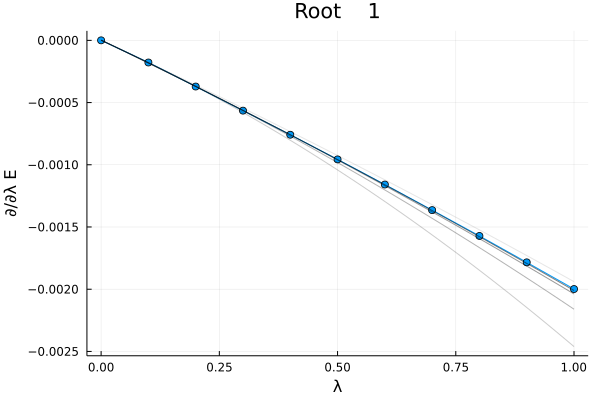

In [9]:
plot_fits(1, fits, dvec, lvec)

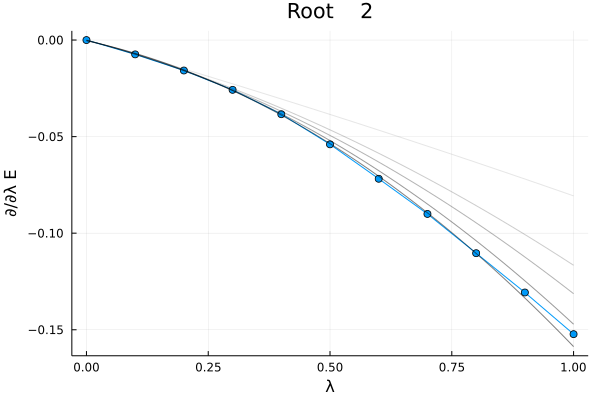

In [19]:
plot_fits(2, fits, dvec, lvec)

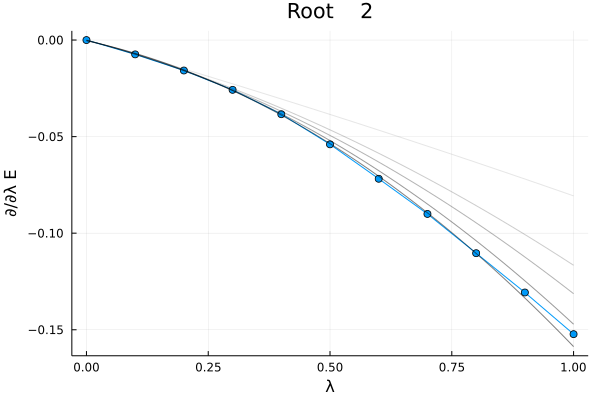

In [20]:
plot_fits(3, fits, dvec, lvec)

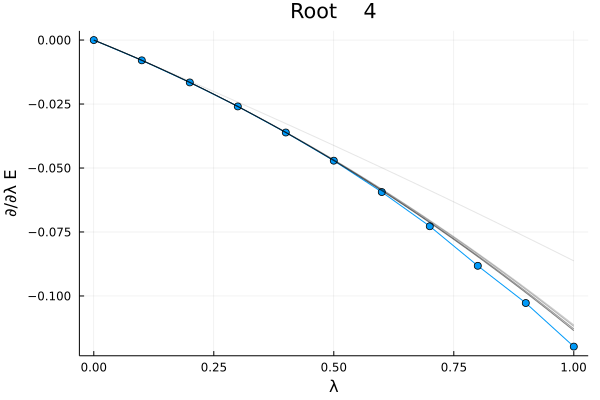

In [21]:
plot_fits(4, fits, dvec, lvec)

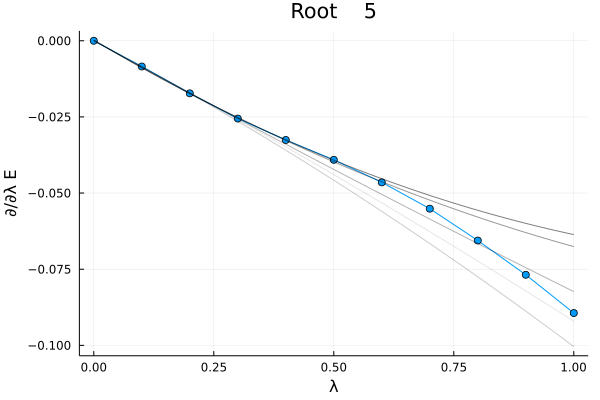

In [22]:
plot_fits(5, fits, dvec, lvec)

# Fixed basis AC

Instead of solving for an adaptive basis at only small values of lambda, perhaps we can fix the basis, then solve for different lambda values in that same basis. We could then solve for approximate basis at λ=1, and then scan backword in the same basis, or we could solve accurate basis for λ=.1 (for example) and then scan forward to λ=1, fixing the basis. The question, will then be if the integral of the path is more accurate than the final point. 

In [41]:
lvec, evec, dvec, dims, times = FermiCG.compute_ac_fixed(v, cluster_ops, clustered_ham, 1.0, lambda_grid,
                                                   thresh_var = 1e-1,
                                                   thresh_foi = 1e-6,
                                                   thresh_pt = 1e-3
                                                  )


 Reference λ =   1.00000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-6
 thresh_pt        : 0.001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                                77 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.005612 seconds (93.46 k allocations: 6.314 MiB)
 Compute <S^2>:                                      0.002107 seconds (25.06 k allocations: 1.938 MiB)
  Root       Energy           S2
     1 -16.88521807   0.00000000
     2 -15.37378501   2.00000000
     3 -15.37105099   2.00000000
     4 -15.37099578   2.00000000
     5 -15.36813769   2.00000000

 Compute

 Add results together:                               0.632100 seconds (1.13 M allocations: 1.108 GiB, 27.10% gc time, 4.19% compilation time)
 Total time spent building FOIS:                     1.607699 seconds
 FOIS compressed from:                                 431603 → 221695     (thresh =  1.0e-06)
     1 -16.88524912
     2 -15.43032466
     3 -15.41898681
     4 -15.41893190
     5 -15.40710250

 PT vector reference space dim:                            21
 Length of input      FOIS:                            221695
 Build exact <X|V|0>:                                1.347889 seconds (2.74 M allocations: 1.201 GiB, 78.14% gc time)
 Compute <0|H0|0>:                                   0.002380 seconds (42.67 k allocations: 2.878 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -16.88524912 -11.55001954
     2 -15.43032469  -9.95907494
     3 -15.41898679  -9.97556639
     4 -15.41893189  -9.97515034
     5 -15.40710250  -9.99117775
 Compute <X|F|0>:                                

 Time to solve for PT1 with conjugate gradient:      1.567298 seconds
 Time to solve for PT1 with conjugate gradient:      0.862474 seconds
 Time to solve for PT1 with conjugate gradient:      0.764588 seconds
 Time to solve for PT1 with conjugate gradient:      1.335006 seconds
 Time to solve for PT1 with conjugate gradient:      0.893983 seconds
 Compute <0|H|1>:                                    0.805085 seconds (2.84 M allocations: 819.146 MiB, 72.94% gc time)
 State   1: E(PT2) corr:                          -0.00047641
 State   2: E(PT2) corr:                          -0.00011121
 State   3: E(PT2) corr:                          -0.00049368
 State   4: E(PT2) corr:                          -0.00046711
 State   5: E(PT2) corr:                          -0.00079731
 State   1: E(PT2):                              -16.88572517
 State   2: E(PT2):                              -15.43099860
 State   3: E(PT2):                              -15.41987366
 State   4: E(PT2):               

 Iter:  12 SS: 56   E:  -11.55006458*  -10.03850886   -10.03583497   -10.03583448   -10.03316020   R: 7.5e-07* 8.8e-06  1.3e-05  1.0e-05  1.0e-05   LinDep: 8.8e-15* 
 Iter:  13 SS: 5    E:  -11.55006458*  -10.03850886*  -10.03583501   -10.03583444   -10.03316020*  R: 7.4e-07* 7.3e-07* 2.8e-06  1.8e-06  7.7e-07*  LinDep: 1.0e-14* 
 Iter:  14 SS: 7    E:  -11.55006458*  -10.03850886*  -10.03583508   -10.03583437   -10.03316020*  R: 7.3e-07* 7.3e-07* 2.2e-06  1.4e-06  7.7e-07*  LinDep: 3.0e-14* 
 Iter:  15 SS: 9    E:  -11.55006458*  -10.03850886*  -10.03583510*  -10.03583436*  -10.03316020*  R: 7.3e-07* 7.3e-07* 8.3e-07* 7.4e-07* 7.7e-07*  LinDep: 2.8e-14* 
 Diagonalization time:                               2.998461 seconds
 Compute <S^2>:                                      0.025154 seconds (404.50 k allocations: 26.654 MiB)
  Root       Energy           S2
     1 -11.55006458   0.00000000
     2 -10.03850886   2.00000000
     3 -10.03583510   2.00000007
     4 -10.03583436   1.99999

 Iter:   7 SS: 35   E:  -13.15069145*  -11.64261873   -11.64013554   -11.64010301   -11.63755163   R: 7.0e-07* 3.2e-04  3.2e-04  3.1e-04  3.1e-04   LinDep: 2.0e-15* 
 Iter:   8 SS: 39   E:  -13.15069145*  -11.64261877   -11.64013559   -11.64010306   -11.63755167   R: 7.0e-07* 6.0e-05  6.1e-05  6.3e-05  6.1e-05   LinDep: 2.3e-15* 
 Iter:   9 SS: 43   E:  -13.15069145*  -11.64261877   -11.64013559   -11.64010306   -11.63755168   R: 7.0e-07* 2.0e-05  2.0e-05  2.2e-05  2.1e-05   LinDep: 3.4e-15* 
 Iter:  10 SS: 47   E:  -13.15069145*  -11.64261877   -11.64013559   -11.64010306   -11.63755168   R: 7.0e-07* 9.3e-06  9.7e-06  1.0e-05  9.9e-06   LinDep: 1.1e-15* 
 Iter:  11 SS: 51   E:  -13.15069145*  -11.64261877   -11.64013559   -11.64010306   -11.63755168   R: 7.0e-07* 7.8e-06  7.3e-06  8.8e-06  5.0e-06   LinDep: 2.2e-16* 
 Iter:  12 SS: 55   E:  -13.15069145*  -11.64261877   -11.64013559   -11.64010306   -11.63755168   R: 6.9e-07* 1.8e-06  1.8e-06  2.2e-06  1.1e-06   LinDep: 3.9e-15* 
 Ite

 λ =   0.60000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 |== BST CI ========================================================
 Solve CI with # variables:                               242
 Cache Hamiltonian:                                  0.181929 seconds (1.85 M allocations: 154.808 MiB, 8.24% gc time)
 Iter:   1 SS: 5    E:  -14.75147496   -13.25646758   -13.25281054   -13.25258615   -13.24838094   R: 6.5e-03  2.4e-02  2.2e-02  2.2e-02  2.0e-02   LinDep: 2.8e-15* 
 Iter:   2 SS: 10   E:  -14.75148419   -13.25700413   -13.25324013   -13.25301723   -13.24870284   R: 1.1e-03  2.1e-02  1.9e-02  1.9e-02  1.6e-02   LinDep: 1.3e-15* 
 Iter:   3 SS: 15   E:  -14.75148446   -13.25714471   -13.25335966   -13.25313755   -13.24879650   R: 3.2e-04  9.2e-03  9.1e-03  9.1e-03  8.8e-03   LinDep: 2.7e-15* 
 Iter:   4 SS: 20   E:  -14.75148450   -13.25717822   -13.25339215   -13.25317048   -13.24882762   R: 6.0e-05  4.9e-03  4.7e-03  4.7e-03  4.5e-03   LinDep: 2.8e-15* 
 Ite

 Iter:   6 SS: 30   E:  -15.81877570   -14.34210139   -14.33473808   -14.33467281   -14.32684256   R: 4.5e-06  1.5e-03  1.3e-03  1.3e-03  1.1e-03   LinDep: 1.6e-15* 
 Iter:   7 SS: 35   E:  -15.81877570   -14.34210226   -14.33473882   -14.33467356   -14.32684312   R: 1.4e-06  6.7e-04  7.1e-04  7.2e-04  7.1e-04   LinDep: 2.4e-15* 
 Iter:   8 SS: 40   E:  -15.81877570*  -14.34210242   -14.33473901   -14.33467375   -14.32684331   R: 4.7e-07* 1.3e-04  1.4e-04  1.5e-04  1.1e-04   LinDep: 5.4e-15* 
 Iter:   9 SS: 44   E:  -15.81877570*  -14.34210243   -14.33473901   -14.33467376   -14.32684331   R: 4.7e-07* 5.8e-05  8.6e-05  8.6e-05  5.3e-05   LinDep: 8.3e-15* 
 Iter:  10 SS: 48   E:  -15.81877570*  -14.34210243   -14.33473902   -14.33467377   -14.32684331   R: 4.7e-07* 2.8e-05  5.5e-05  5.3e-05  2.9e-05   LinDep: 7.3e-15* 
 Iter:  11 SS: 52   E:  -15.81877570*  -14.34210243   -14.33473902   -14.33467377   -14.32684331   R: 4.7e-07* 1.3e-05  3.4e-05  2.8e-05  1.4e-05   LinDep: 4.0e-15* 
 Ite

 Iter:  12 SS: 56   E:  -16.88614618*  -15.43465886   -15.42206856   -15.42184530   -15.40893205   R: 4.9e-07* 3.6e-06  2.1e-05  2.0e-05  4.3e-06   LinDep: 1.9e-15* 
 Iter:  13 SS: 5    E:  -16.88614618*  -15.43465886   -15.42206856   -15.42184530   -15.40893205   R: 4.9e-07* 1.3e-06  1.4e-05  1.3e-05  1.2e-06   LinDep: 5.0e-15* 
 Iter:  14 SS: 8    E:  -16.88614618*  -15.43465886*  -15.42206856   -15.42184530   -15.40893205*  R: 4.8e-07* 5.2e-07* 5.9e-06  5.2e-06  6.6e-07*  LinDep: 2.2e-16* 
 Iter:  15 SS: 10   E:  -16.88614618*  -15.43465886*  -15.42206856   -15.42184530   -15.40893205*  R: 4.7e-07* 3.3e-07* 3.5e-06  3.1e-06  5.6e-07*  LinDep: 0.0e+00* 
 Iter:  16 SS: 12   E:  -16.88614618*  -15.43465886*  -15.42206856   -15.42184530   -15.40893205*  R: 4.6e-07* 2.3e-07* 1.8e-06  1.5e-06  4.9e-07*  LinDep: 1.3e-15* 
 Iter:  17 SS: 14   E:  -16.88614618*  -15.43465886*  -15.42206856*  -15.42184530*  -15.40893205*  R: 4.6e-07* 1.9e-07* 8.9e-07* 8.0e-07* 4.8e-07*  LinDep: 2.2e-15* 
 Dia

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [-16.885218067269 -15.373662343789986 … -15.370987838581188 -15.368313685112396; -16.88522696648214 -15.374028211990709 … -15.37137955564162 -15.368731783385233; … ; -16.885966234133072 -15.420895322408281 … -15.411025505349988 -15.400835127574952; -16.88614618364768 -15.43465885701306 … -15.421845297540429 -15.408932054647222], [-1.858069254012662e-12 -2.3428192719165963e-10 … -2.2972097113438394e-7 -1.5478640591481962e-10; -0.00017838643841550095 -0.007417187563795835 … -0.007938860733865738 -0.008465364222651317; … ; -0.0016984411294043156 -0.12746925660512254 … -0.10018364312422534 -0.07510073410298013; -0.0019010498237133078 -0.14795410078412274 … -0.11640069390895924 -0.08702635593236607], [242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242], [3.247419893, 3.218580612, 3.328102248, 2.929121695, 3.371977061, 3.74423321, 3.446520436, 3.931091637, 3.829741244, 3.41072974, 3.988439716])

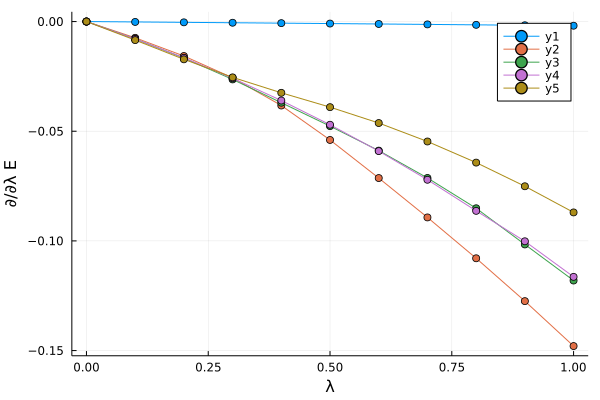

In [42]:
p1 = plot(lvec, dvec, markershape=:circle)
plot!(p1, xaxis="λ")
plot!(p1, yaxis="∂/∂λ E")

In [43]:
function integrate(dvec,lvec)
    e = zeros(size(dvec,2))
    l_last = 0.0
    for (li,l) in enumerate(lvec)
        e += dvec[li,:]*(l-l_last)
        l_last = l
    end
    return e
end
dE_ac = integrate(dvec, lvec)
for (i,ei) in enumerate(dE_ac)
    @printf(" State: %4i E: %12.8f dE: %12.8f\n", i,ei+evec[end,i], ei)
end

 State:    1 E: -16.88716958 dE:  -0.00102339
 State:    2 E: -15.50316794 dE:  -0.06850908
 State:    3 E: -15.47913382 dE:  -0.05706526
 State:    4 E: -15.47859555 dE:  -0.05675026
 State:    5 E: -15.45393817 dE:  -0.04500612


In [45]:
evec[end,:]

5-element Vector{Float64}:
 -16.88614618364768
 -15.43465885701306
 -15.422068556771148
 -15.421845297540429
 -15.408932054647222

In [ ]:
 State:    1 E: -16.88726315 dE:  -0.00107249
 State:    2 E: -15.50411145 dE:  -0.06898137
 State:    3 E: -15.47999473 dE:  -0.05749745
 State:    4 E: -15.47946673 dE:  -0.05719195
 State:    5 E: -15.45460858 dE:  -0.04535037